<a href="https://colab.research.google.com/github/reply2vikas/Project-1/blob/master/Assignment_6_VK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 11s 0us/step


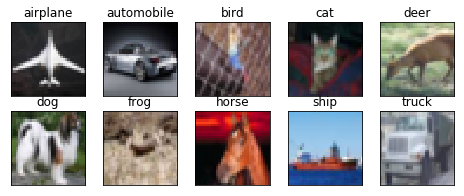

In [5]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [9]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

W0805 13:26:04.556304 140348257818496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0805 13:26:04.599261 140348257818496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0805 13:26:04.606336 140348257818496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':
W0805 13:26:05.231581 140348257818496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and wil

Epoch 1/100
390/390 [==============================] - 27s 70ms/step - loss: 1.8440 - acc: 0.2980 - val_loss: 1.4189 - val_acc: 0.4721
Epoch 2/100
390/390 [==============================] - 20s 52ms/step - loss: 1.3455 - acc: 0.5129 - val_loss: 1.1282 - val_acc: 0.5919
Epoch 3/100
390/390 [==============================] - 20s 52ms/step - loss: 1.1363 - acc: 0.5940 - val_loss: 0.9609 - val_acc: 0.6534
Epoch 4/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9977 - acc: 0.6507 - val_loss: 0.8893 - val_acc: 0.6865
Epoch 5/100
390/390 [==============================] - 20s 52ms/step - loss: 0.9062 - acc: 0.6855 - val_loss: 0.7923 - val_acc: 0.7295
Epoch 6/100
390/390 [==============================] - 20s 51ms/step - loss: 0.8265 - acc: 0.7154 - val_loss: 0.7824 - val_acc: 0.7359
Epoch 7/100
390/390 [==============================] - 20s 51ms/step - loss: 0.7721 - acc: 0.7348 - val_loss: 0.7278 - val_acc: 0.7460
Epoch 8/100
390/390 [==============================] - 

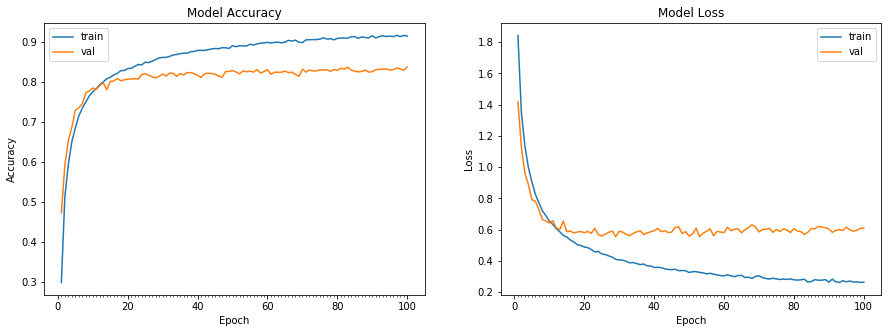

Accuracy on test data is: 83.80


In [11]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [14]:
# Define the model

model = Sequential()

model.add(Convolution2D(64, (3, 3), border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))



model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))


model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, 1))

model.add(Convolution2D(64, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(128, 3, border_mode='same'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.1))

model.add(Convolution2D(10, 2))

model.add(Flatten())
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, 3, padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 128)       73856     
_________________________________________________________________
activation_20 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 32, 32, 128)       512       
__________

In [17]:
from keras.callbacks import LearningRateScheduler
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

BATCH_SIZE = 64
EPOCHS = 100

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, rotation_range=20, horizontal_flip=True)
datagen.fit(train_features)

train_flow = datagen.flow(train_features, train_labels, batch_size=BATCH_SIZE)
valid_flow = datagen.flow(test_features, test_labels, batch_size=BATCH_SIZE, shuffle=False)

STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

history = model.fit_generator(train_flow,
                    epochs=EPOCHS,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_flow,
                    validation_steps=STEP_SIZE_VALID)

Epoch 1/100
781/781 [==============================] - 63s 81ms/step - loss: 1.3325 - acc: 0.5219 - val_loss: 1.1118 - val_acc: 0.6102
Epoch 2/100
781/781 [==============================] - 62s 80ms/step - loss: 1.0142 - acc: 0.6457 - val_loss: 0.9900 - val_acc: 0.6633
Epoch 3/100
781/781 [==============================] - 62s 80ms/step - loss: 0.8669 - acc: 0.6968 - val_loss: 0.8065 - val_acc: 0.7154
Epoch 4/100
781/781 [==============================] - 63s 80ms/step - loss: 0.7817 - acc: 0.7288 - val_loss: 0.7750 - val_acc: 0.7325
Epoch 5/100
781/781 [==============================] - 62s 80ms/step - loss: 0.7151 - acc: 0.7543 - val_loss: 0.7983 - val_acc: 0.7338
Epoch 6/100
781/781 [==============================] - 62s 80ms/step - loss: 0.6726 - acc: 0.7680 - val_loss: 0.6638 - val_acc: 0.7722
Epoch 7/100
781/781 [==============================] - 62s 80ms/step - loss: 0.6383 - acc: 0.7802 - val_loss: 0.7123 - val_acc: 0.7540
Epoch 8/100
781/781 [==============================] - 

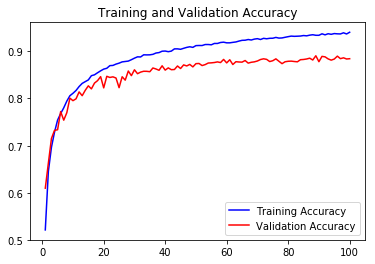

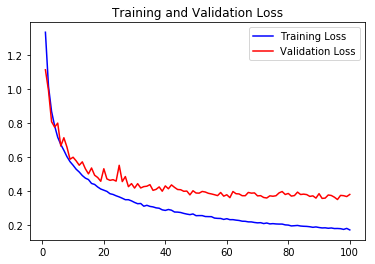

In [18]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and Validation Accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs,val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
#Train and Validation Loss
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs,val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()